# DAY6

之前已经说过，对于数据可视化一般会进行如下操作
1. 单特征分布可视化
2. 特征与标签关系可视化
3. 特征与特征关系可视化

## 单特征分布可视化

### 找到连续特征

In [10]:
# 首先查看都有什么特征
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [11]:
# 找到所有的连续特征，这是之前的写法
continuous_features = []
for i in data.columns:
    if data[i].dtype != 'object':
        continuous_features.append(i)
continuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [12]:
# 实际上，实现上述操作，更简单的方法如下，借助select_dtypes方法。
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
continuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

这里我们思考一下，既然实现一个路径有很多方法，到底什么方法是最好的呢？

如果你在执行复杂的项目，你需要考虑到内存管理、运行效率、算法负责度，甚至是代码美观性。

但是目前你的目标就是达到目的即可，所以你应该用最简单最直观的方法，这便于你读者一眼知道你在做什么。也不要过于记忆太多新的函数加大自己的学习成本。

所以这里我推荐第一种方法，但是你问ai 他会告诉你第二种，第二种能看懂即可


### 初识matplotlib库

作为一个朴素的人类，你觉得绘制一个图需要什么？
1. 需要指定图的类型，比如折线图，散点图，柱状图等
2. 需要指定图的坐标轴，比如x轴和y轴，并且传入数据
3. 需要指定图的标题，比如x轴和y轴的标签，以及标题

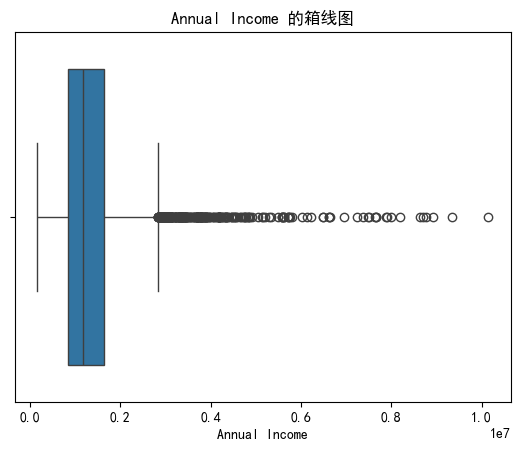

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.boxplot(x=data['Annual Income'])
plt.title('Annual Income 的箱线图')
plt.xlabel('Annual Income')
plt.show()

此时你会发现 
1. 下方有莫名其妙的警告
2. 中文字符显示不全

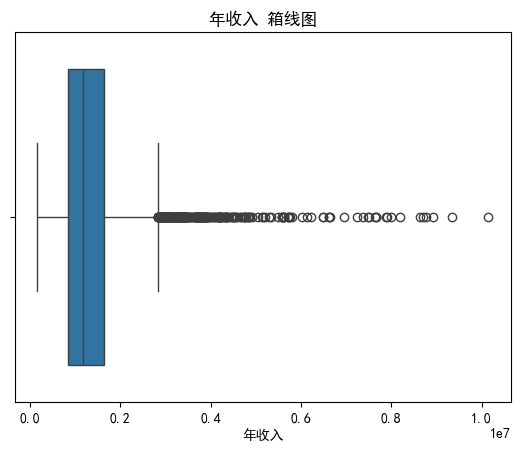

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置全局字体为支持中文的字体 (例如 SimHei)
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x=data['Annual Income'])
plt.title('年收入 箱线图')  # 使用中文标题
plt.xlabel('年收入')      # 使用中文标签
plt.show()

数值变量有的是连续变量 有的是离散变量

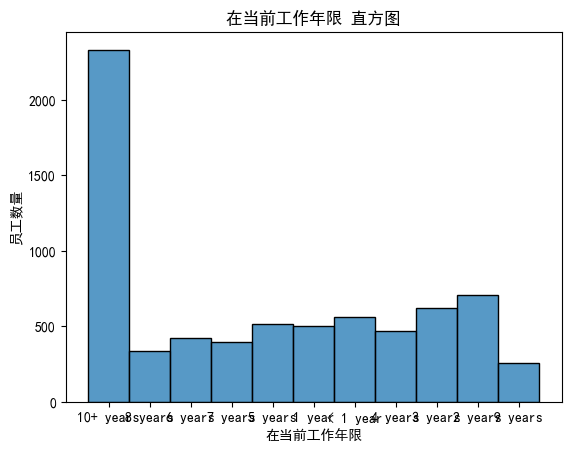

In [15]:
# 绘制直方图
sns.histplot(data['Years in current job'])
plt.title('在当前工作年限 直方图')
plt.xlabel('在当前工作年限')
plt.ylabel('员工数量')
plt.show()

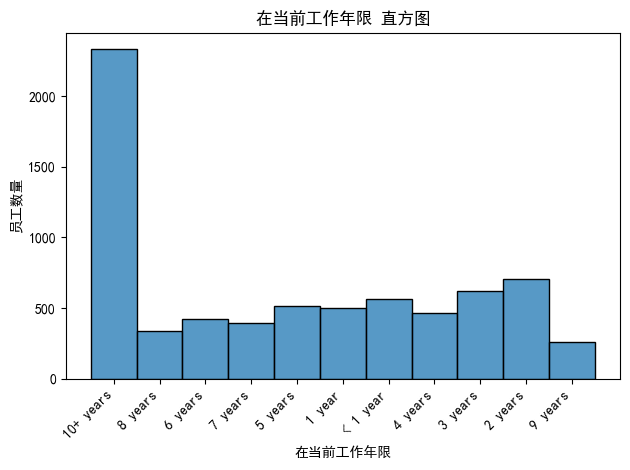

In [16]:
# 还有很多新的参数可以调整图像 但是不需要记忆 用的时候问下ai即可
sns.histplot(x=data['Years in current job'])
plt.title('在当前工作年限 直方图')
plt.xlabel('在当前工作年限')
plt.ylabel('员工数量')
plt.xticks(rotation=45, ha='right')  # 旋转45度，并右对齐
plt.tight_layout()  # 自动调整子图参数，提供足够的空间
plt.show()

## 绘制特征和标签的关系

标签是离散的，特征如果是连续的应该绘制什么图？

可以分别考虑违约和不违约情况下的连续特征，画2个箱线图




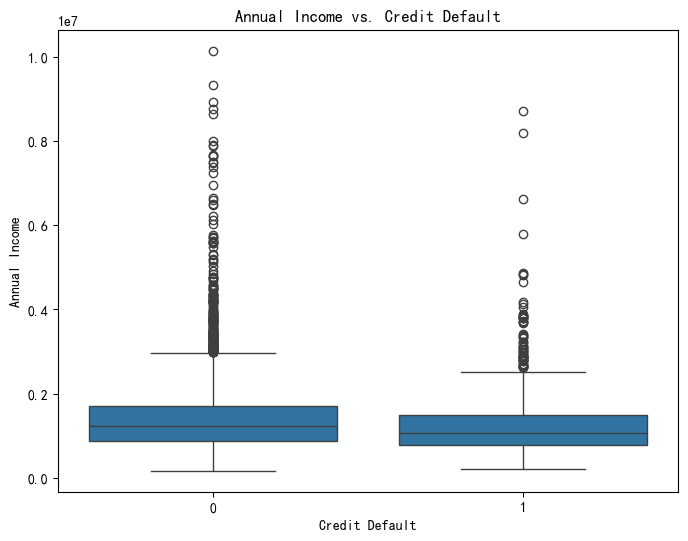

In [19]:
# 另一种可视化方式：箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit Default', y='Annual Income', data=data)
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Annual Income')
plt.show()

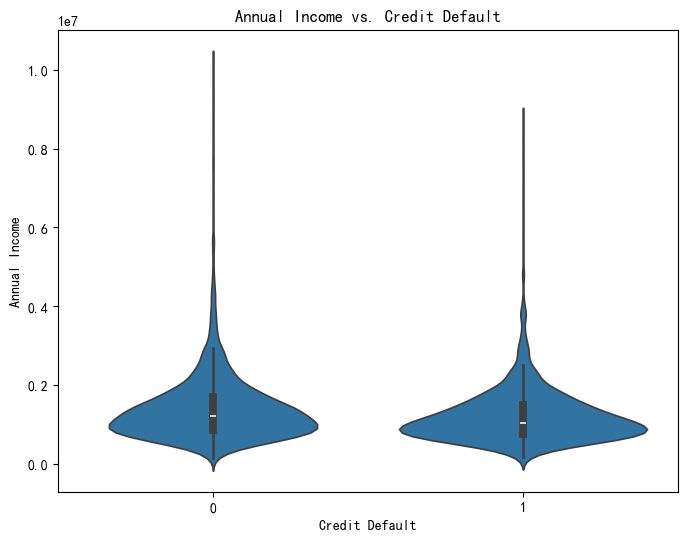

In [ ]:
# 另一种可视化方式：小提琴图
# 相较于箱线图，小提琴图更加美观
plt.figure(figsize=(8, 6))
sns.violinplot(x='Credit Default', y='Annual Income', data=data)
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Annual Income')
plt.show()

但是实际上连续变量也可以绘制类似于直方图的图像，可以用核密度估计来完成边缘的柔和化

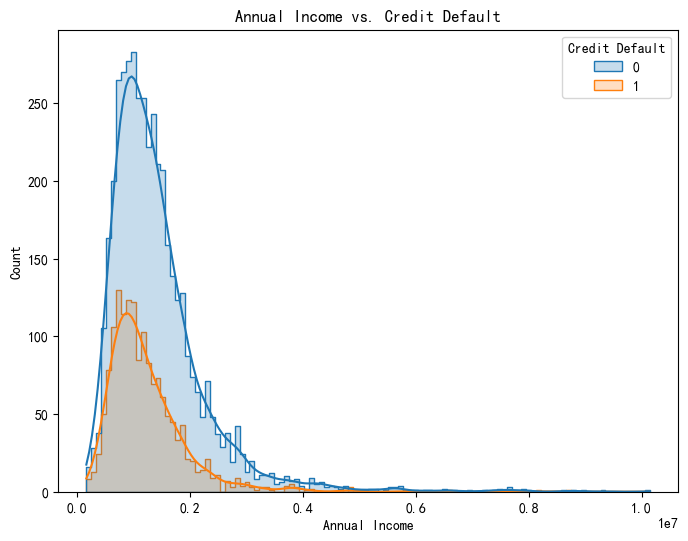

In [18]:
# 绘制 Annual Income 和 Credit Default 的关系图
plt.figure(figsize=(8, 6))
sns.histplot(x='Annual Income', hue='Credit Default', data=data, kde=True, element="step")
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

绘制离散变量和标签的关系

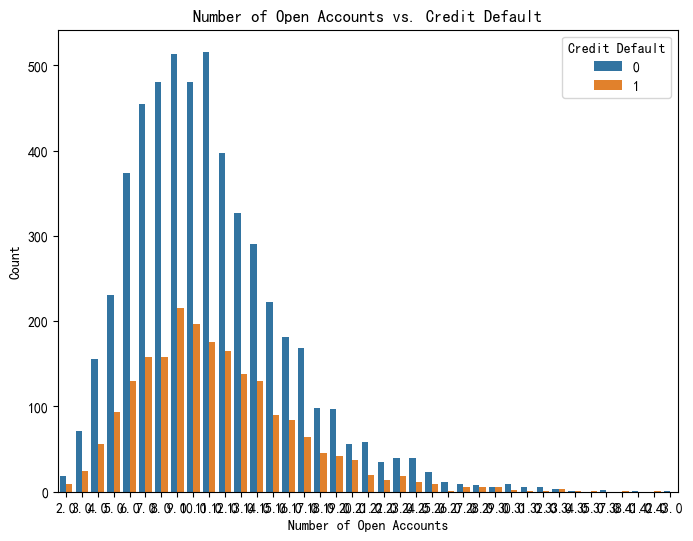

In [21]:
# 绘制 Number of Open Accounts 和 Credit Default 的关系图
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of Open Accounts', hue='Credit Default', data=data)
plt.title('Number of Open Accounts vs. Credit Default')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.show()

可以看到 如果number of open accounts的值太多 就会很散，不美观，所以这时候采取分组的措施

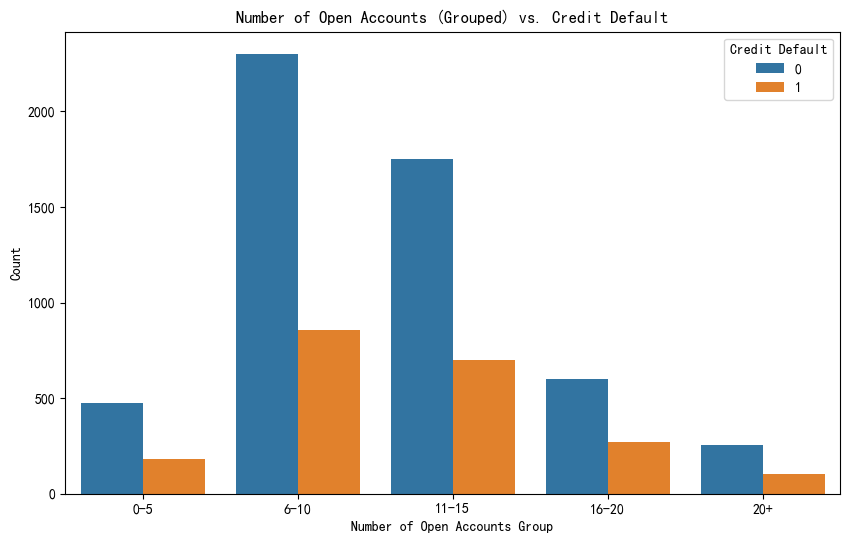

In [ ]:
# 将 "Number of Open Accounts" 分组
data['Open Accounts Group'] = pd.cut(data['Number of Open Accounts'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '20+']) # 根据你的数据调整分组

plt.figure(figsize=(10, 6))
sns.countplot(x='Open Accounts Group', hue='Credit Default', data=data)
plt.title('Number of Open Accounts (Grouped) vs. Credit Default')
plt.xlabel('Number of Open Accounts Group')
plt.ylabel('Count')
plt.show()

现在开始尝试对与其他的连续变量  离散变量都分别绘制 

观察一下数据的特点，很多时候我们需要单纯从数据分布来认识数据，这才是真正有价值的事情。

国内目前就有很有意思的现象：
1. 科研界喜欢ai
2. 政府政策相关研究讨厌ai


是因为ai太浮于表面，很多时候不需要靠模型，单纯从数据上就可以得到很多有意思的结果。